# Extracting Individual Components from a Mixed Signal using PCA and ICA

Independent Component Analysis (ICA) has proven to be an effective data driven method for analyzing EEG data, separating signals from temporally and functionally independent brain and non-brain source processes and thereby increasing their definition. An EEG test has various activities like Blinks, EKG, EMG, Line-noise, EOG. We can identify these Individual activities and generate a corrected EEG, As shown in the figure below

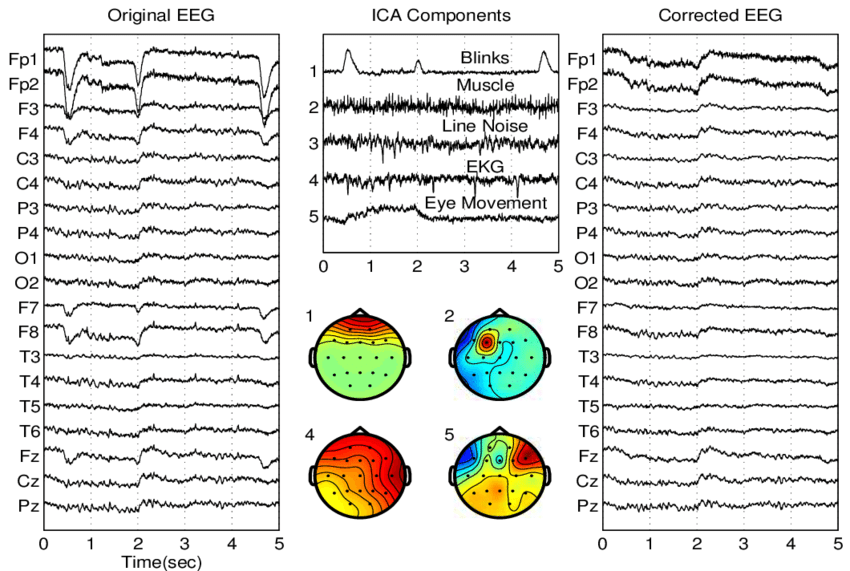

In [1]:
import numpy as np # For creating arrays and spectral-series
import scipy.signal as sp #For generating required signals
import matplotlib.pyplot as plt # for plotting the results

For this example let us generate 3 simple signals, Sine, Sawtooth and Square. With a sampling frequency of 100Hz .

In [2]:
sampl_rate=1000
t=np.linspace(0,20,500)
sfreq=100
sine=1*np.sin(2*np.pi*sfreq*t)
sawtooth=1*sp.sawtooth(2*np.pi*sfreq*t)
square=1*sp.square(2*np.pi*sfreq*t)

Plotting the individual signals.

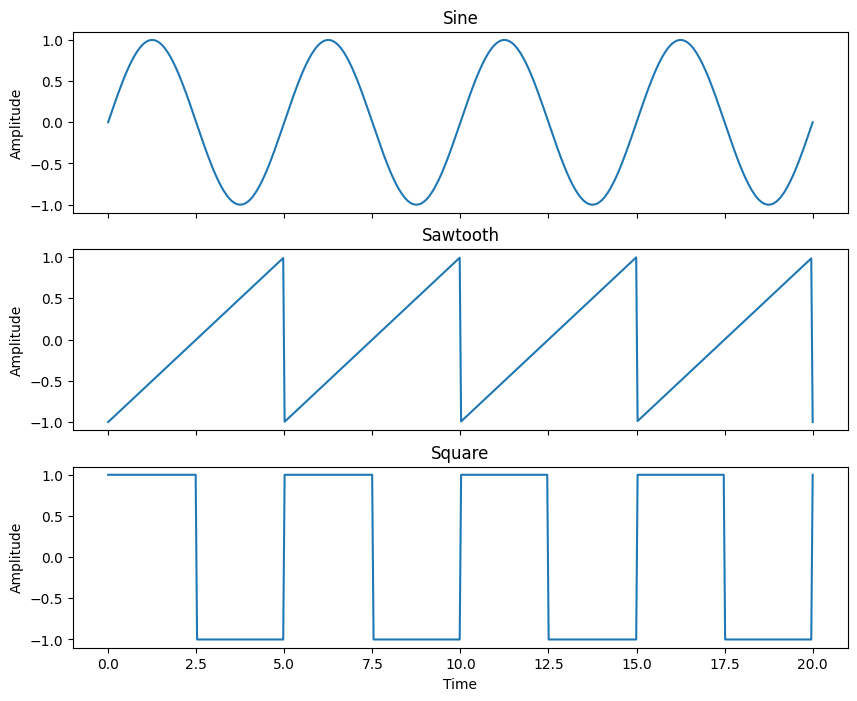

In [3]:
fig, px = plt.subplots(3,1,figsize=(10,8))
px[0].plot(t,sine)
px[0].set_title('Sine')
px[0].set_ylabel('Amplitude')
px[1].plot(t,sawtooth)
px[1].set_title('Sawtooth')
px[1].set_ylabel('Amplitude')
px[2].plot(t,square)
px[2].set_title('Square') 
plt.xlabel('Time')
plt.ylabel('Amplitude')
for px in px. flat: 
    px.label_outer()

The next step would be to stack the signals column wise, in order to combine them in a particular ratio. We will also add random noise to the data

In [4]:
stacked=np.c_[sine,sawtooth,square]
stacked+=0.2*np.random.normal(size=stacked.shape)
stacked/=stacked.std(axis=0) #Standardizing the data

Visualizing the stacked signals

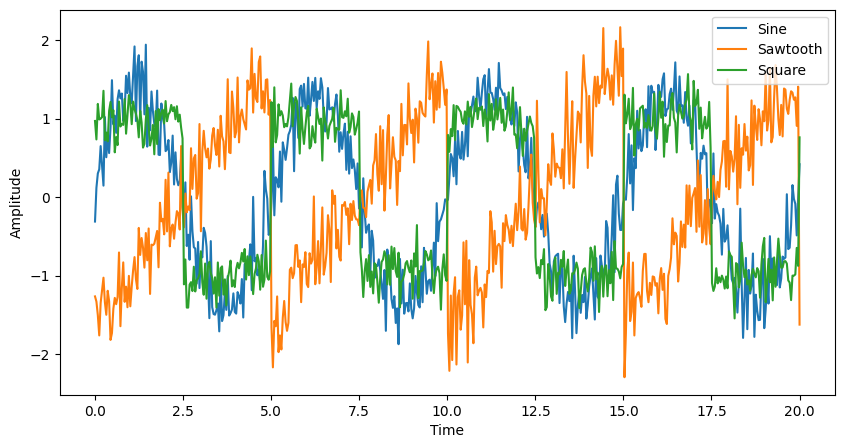

In [5]:
plt.figure(figsize=(10,5))
plt.plot(t,stacked)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(['Sine','Sawtooth','Square'],loc='upper right')
plt.show()

Let us combine the signals in the following combination:
+ Square: 20%; Sine: 20%; Sawtooth: 60%
+ Square: 33%; Sine: 33%; Sawtooth: 34%
+ Square: 60%; Sine: 20%; Sawtooth: 20%


In [6]:
X=np.array([[0.2,0.2,0.6],[0.33,0.33,0.34],[0.6,0.2,0.2]])

In [7]:
Mixed=np.dot(stacked,X.T)

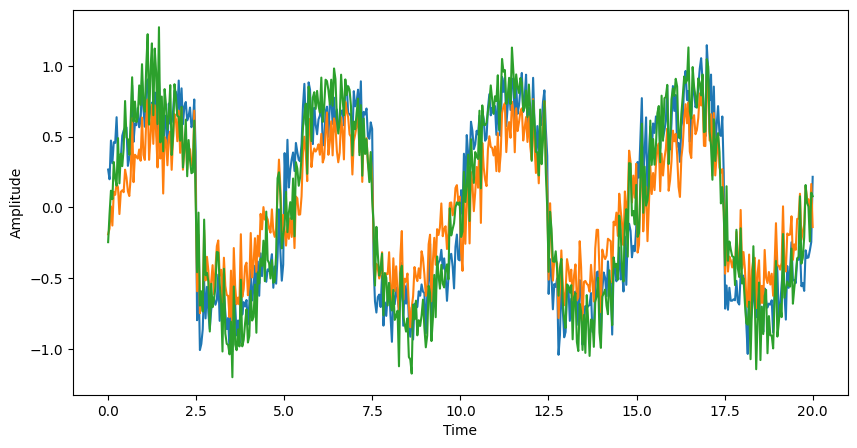

In [8]:
plt.figure(figsize=(10,5))
plt.plot(t,Mixed)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## PCA vs ICA

In [9]:
from sklearn.decomposition import PCA,FastICA

In [10]:
pca=PCA(n_components=3)
ica=FastICA(n_components=3)

In [11]:
out_pca=pca.fit_transform(Mixed)
out_ica=ica.fit_transform(Mixed)

c:\Users\91852\miniconda3\envs\machine-learning-env\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


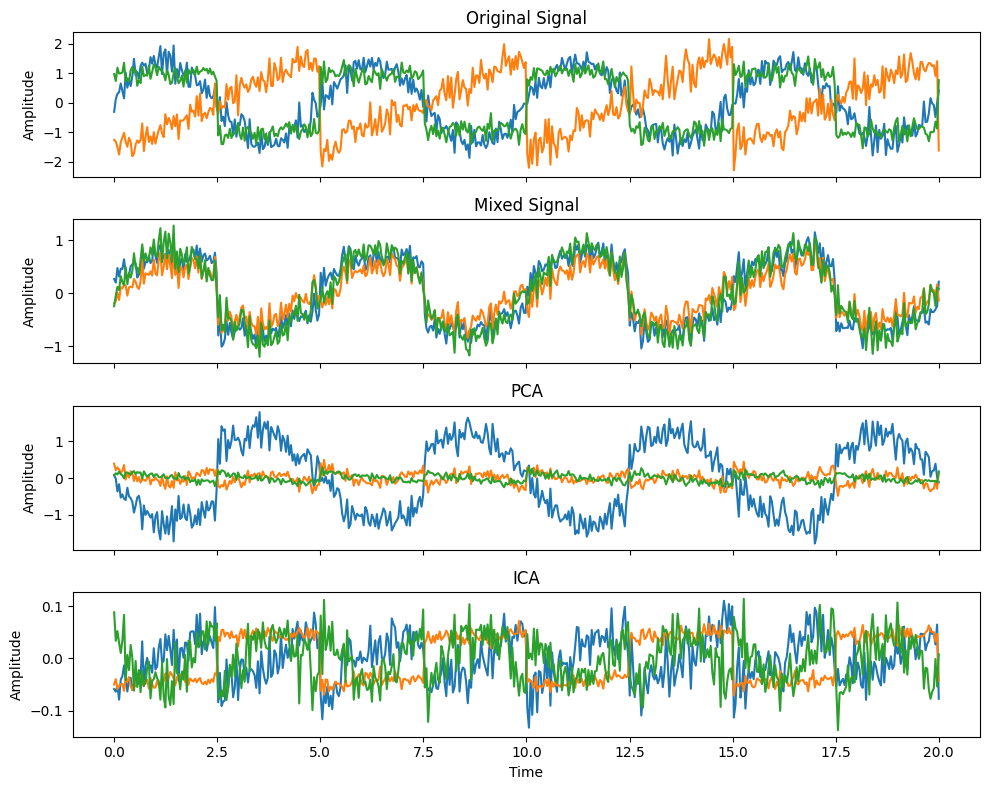

In [12]:
fig, ax = plt.subplots(4,1,figsize=(10,8))

ax[0].plot(t,stacked)
ax[0].set_title('Original Signal') 
ax[0].set_ylabel('Amplitude')

ax[1].plot(t,Mixed)
ax[1].set_title('Mixed Signal')
ax[1].set_ylabel('Amplitude')

ax[2].plot(t, out_pca)
ax[2].set_ylabel('Amplitude')
ax[2].set_title('PCA') 

ax[3].plot(t,out_ica)
ax[3].set_title('ICA')
ax[3].set_ylabel('Amplitude')
ax[3].set_xlabel('Time')
for ax in ax.flat:
    ax.label_outer() 

plt.tight_layout()
plt.show()

From the above plots we can see that ICA works best, and even though the amplitude is reduced, the signal is still the same.
Another reason of selecting ICA is to identify components which are mutually independent from each other ie their mutual information is 0,  I(comp1,comp2)=0.
In the case of PCA we aim for finding the correlation between two features , by maximizing the variation.
In order to identify the brain and non-brain activity ICA is best suited for the job